## Deep Neural Networks Implementation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

### Making the Data

In [2]:
np.random.seed(0)

number_of_pts = 500
points, label = datasets.make_circles(n_samples=number_of_pts, random_state=123, noise=0.1, factor=0.2)
# // random state for the samples, noise is better low so that it can be easily classified,
# // factor is the diam of the inner points corresponding to the outer points
# print(points) # // points coordinates in (x and y coordinates) referred to as (X)
# print(label) # // labels of points referred to as (y)

# // the labeling is made so that the points in the inner circle of data, are labeled 1 and in the outer circle
# // are labeled 0

### plotting the data

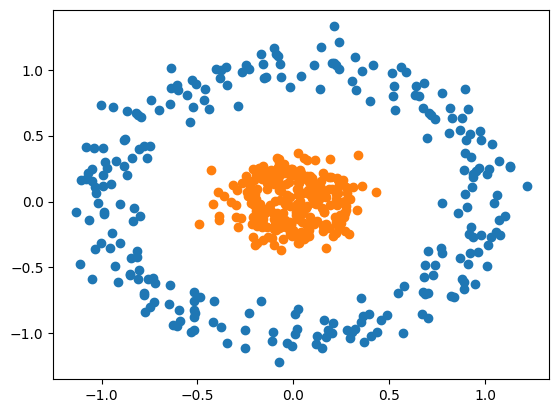

In [3]:
# // the points with label 0 and the x-y coordinates(x-coordinate=0, y-coordinate=1)

## plotting the outer circle of data with label = 0
plt.scatter(points[label == 0, 0], points[label == 0, 1] )
# plt.scatter(points[label == 0, 0], points[label == 0, 1], c="red" )


## plotting the inner circle of data with label = 1
plt.scatter(points[label == 1, 0], points[label == 1, 1] )
# plt.scatter(points[label == 1, 0], points[label == 1, 1], c="b" )

plt.show()

### Model

In [4]:
nn_model = Sequential()
# // the hidden layer with dense, the no of neurons(perceptrons), no. of inputs, activation_function
nn_model.add(Dense(4, input_shape=(2, ), activation='sigmoid') )
# // the output layer, no need to specify the no. of inputs as we did in the previous layer
nn_model.add(Dense(1, activation='sigmoid') )

# // model.compile, optimizer is ADAM, loss is bin_crossentropy because its classification between two classes 0 and 1,
# // metrics(accuracy)
adam = Adam(learning_rate=0.01)
nn_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'] )

# // running the model, the new name for data after model -> nn_model_fit
# // verbosity: displays a progress bar of info relating to the performance of model at each epoch
# // batch size: dividing the single epoch to iterations
# // epochs: no. of epochs
# // shuffle: max the accuracy

nn_model_fit = nn_model.fit(x=points, y=label, verbose=1, batch_size=20, epochs=100, shuffle=True)

# // I tried 100 epochs (high number) first, to know the more optimal number of epochs
# // it reaches 1.00 accuracy after hitting (run with python console) faster than if I don't
# // maybe after solving the tensorflow warning I solved
# // it reached 1.00 accuracy after 32 epochs and sometimes 52 epochs

Epoch 1/100


D:\coding projects\PyCharm projects\new projects\S-D-C-2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4797 - loss: 0.6971   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.6538 - loss: 0.6945
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.6363 - loss: 0.6938
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.5183 - loss: 0.6913
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.6795 - loss: 0.6899
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.6695 - loss: 0.6898
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.6103 - loss: 0.6874
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.5928 - loss: 0.6850
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7178 - loss: 0.6813
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6943 - loss: 0.6794 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8307 - loss: 0.6742
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step

#### Plotting the Accuracy and Error plots

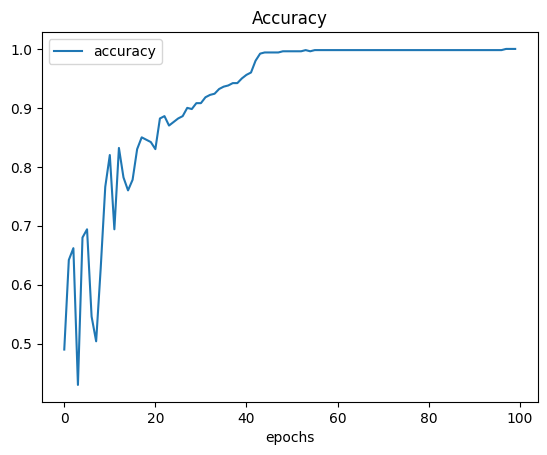

In [5]:
## Accuracy plot

acc_plot = plt.plot(nn_model_fit.history['accuracy'] )
plt.xlabel('epochs')
plt.legend(['accuracy'] )
plt.title('Accuracy')
plt.show()

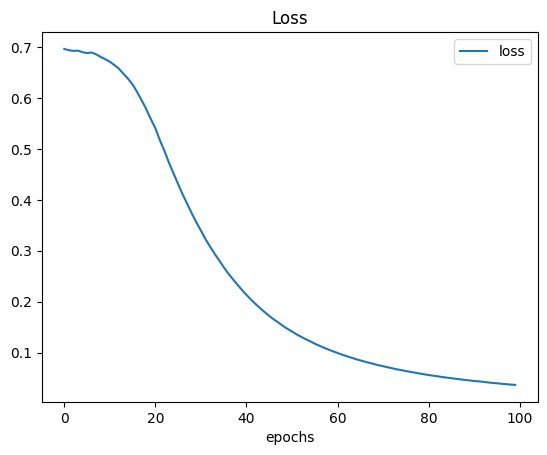

In [6]:
## Error plot

plt.plot(nn_model_fit.history['loss'] )
plt.xlabel('epochs')
plt.legend(['loss'] )
plt.title('Loss')
plt.show()

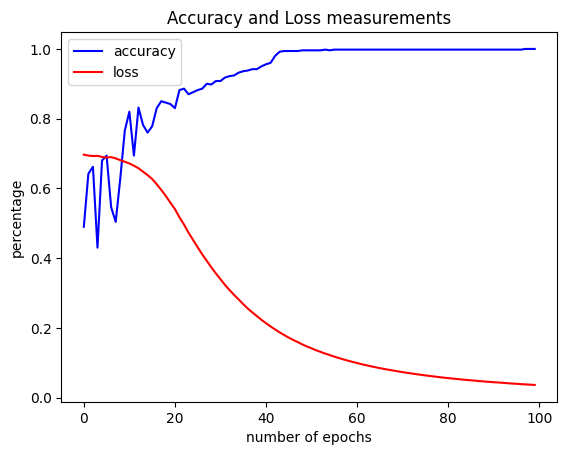

In [7]:
## both plots
plt.plot(nn_model_fit.history['accuracy'], color='blue', label='accuracy')
plt.plot(nn_model_fit.history['loss'], color='red', label='loss')
plt.xlabel("number of epochs")
plt.ylabel("percentage")
plt.title("Accuracy and Loss measurements")
plt.legend()
plt.show()

### function-plotting the decision boundary, sec(7.2)

In [8]:
def plot_decision_boundary(X, model):
    x_span = np.linspace(min(X[ : , 0]) - 0.25, max(X[ : , 0]) + 0.25, 50) # // 0.25 worked better instead of 1
    y_span = np.linspace(min(X[ : , 1]) - 0.25, max(X[ : , 1]) + 0.25, 50)
    # print("x_span = ", x_span)     # // horizontal
    # print(f"y_span =  {y_span}")      # // vertical
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()  # // to flatten them from 2D to 1D
    grid = np.c_[xx_, yy_]
    prediction_function = model.predict(grid)
    prediction_function_reshaped = prediction_function.reshape(xx.shape)
    plt.contourf(xx, yy, prediction_function_reshaped)

### Plotting the Contour with all points and making a prediction for a single point

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


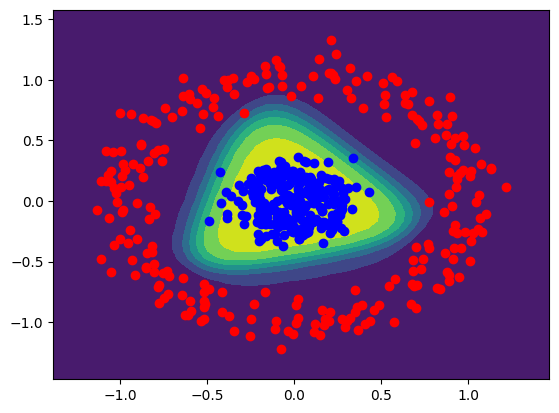

In [9]:
plot_decision_boundary(points, nn_model)

# plt.scatter(points[ :number_of_pts, 0], points[ :number_of_pts, 1] )
# plt.scatter(points[number_of_pts: , 0], points[number_of_pts: , 1] )

# // or to write the same as I wrote above in a better way, the same as the first plot block above
## the outer region
plt.scatter(points[label == 0, 0], points[label == 0, 1], c="red" )
## the inner region
plt.scatter(points[label == 1, 0], points[label == 1, 1], c="b" )

plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


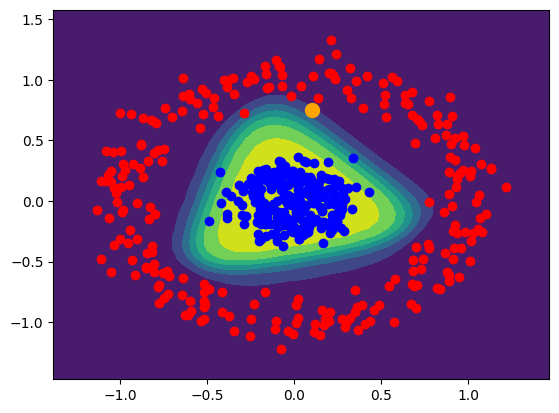

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The model's prediction for the point is: [[17.8132]]%


In [10]:
#### predicting a single point I choose

## First plotting the contour
plot_decision_boundary(points, nn_model)

# the outer region
plt.scatter(points[label == 0, 0], points[label == 0, 1], c="red" )
# the inner region
plt.scatter(points[label == 1, 0], points[label == 1, 1], c="b" )

# // from the plot pic determine the coordinates that you want
x = 0.1
y = 0.75
point = np.array([[x, y] ] )

plt.plot([x], [y], marker='o', markersize=10, color='orange')
plt.show()

point_prediction = nn_model.predict(point) * 100
print(f"The model's prediction for the point is: {point_prediction}%")